<a href="https://colab.research.google.com/github/skyanalyst/Exploratory_data_analysis/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis On Brazalian University Scholarships**

**About the dataset**

The Prouni — Programa Universidade para Todos (University for All Program) is an initiative created by the Brazilian government in 2005 with the objective to support students with full or partial scholarships to study in private universities.

This dataset contains data from 2005 until 2019 showing details about the students who got scholarships.

The students must not have an university degree, must have participated in the latest Enem (national exam for federal university’s application) and reach a minimum score to be eligible to receive the scholarship.

**Fetching a dataset online and downloading it**

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od 

In [2]:
scholarship_url = 'https://www.kaggle.com/datasets/lfarhat/brasil-students-scholarship-prouni-20052019'
od.download(scholarship_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akashsharma1996
Your Kaggle Key: ··········


100%|██████████| 49.8M/49.8M [00:00<00:00, 72.8MB/s]


In [4]:
import pandas as pd
scholarship_csv ='/content/brasil-students-scholarship-prouni-20052019/prouni_2005_2019.csv'
scholarship_data = pd.read_csv(scholarship_csv)

**Pandas Data Preparation and Cleaning**

1.   Renaming the columns.
2.   Parsing Date column to datetime.
3.   Dealing with missing values.




In [15]:
scholarship_data.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA', 'idade'],
      dtype='object')

*Renaming the columns of the dataframe as the columns are written in brazalian languages.*

In [16]:
scholarship_data =pd.DataFrame(scholarship_data)

In [48]:
scholarship_data.rename(columns = {
        'ANO_CONCESSAO_BOLSA':'scholarship_issued_by_year', 'CODIGO_EMEC_IES_BOLSA':'University_ID', 'NOME_IES_BOLSA': 'University_Name',
       'TIPO_BOLSA':'Scholarship_Name', 'MODALIDADE_ENSINO_BOLSA': 'Teaching_mode', 'NOME_CURSO_BOLSA': 'Course_name',
       'NOME_TURNO_CURSO_BOLSA':'Class_Shift', 'CPF_BENEFICIARIO_BOLSA':'Student_ID',
       'SEXO_BENEFICIARIO_BOLSA':'Gender', 'RACA_BENEFICIARIO_BOLSA':'Race',
       'DT_NASCIMENTO_BENEFICIARIO':'Birthdate', 'BENEFICIARIO_DEFICIENTE_FISICO':'Special_need_student',
       'REGIAO_BENEFICIARIO_BOLSA':'Residence_Region', 'SIGLA_UF_BENEFICIARIO_BOLSA':'Residence_Region',
       'MUNICIPIO_BENEFICIARIO_BOLSA':'Residence_State', 'idade':'Age'},inplace = True)

In [63]:
scholarship_data.columns

Index(['scholarship_issued_by_year', 'University_ID', 'University_Name',
       'Scholarsip_Name', 'Teaching_mode', 'Course_name', 'Class_Shift',
       'Student_ID', 'Gender', 'Race', 'Birthdate', 'Special_need_student',
       'Residence_Region', 'Residence_Region', 'Residence_State', 'Age'],
      dtype='object')

*Parsing the `birthdate` column to `datetime` using `pd.to_datetime`*

In [34]:
scholarship_data['Birthdate']=pd.to_datetime(scholarship_data['Birthdate'])

*Dropping the `age` data for which the age is less than 15 and greater than 45*

In [36]:
scholarship_data.drop(scholarship_data[scholarship_data.Age > 45].index, inplace =True)
scholarship_data.drop(scholarship_data[scholarship_data.Age < 15].index, inplace =True)

*Check if data has null values using `.isna()` command*

In [37]:
scholarship_data.isna().sum()

scholarship_issued_by_year       0
University_ID                    0
University_Name                425
Scholarsip_Name                  0
Teaching_mode                    0
Course_name                   5207
Class_Shift                      0
Student_ID                       0
Gender                           0
Race                             0
Birthdate                        0
Special_need_student             0
Residence_Region               381
Residence_Region               381
Residence_State                381
Age                              0
dtype: int64

**Exploratory Analysis and Visulaisation**

***Scholaship Issued Year***

([<matplotlib.axis.XTick at 0x7efbebefc9a0>,
 [Text(0, 0, '2005'),
  Text(0, 0, '2006'),
  Text(0, 0, '2007'),
  Text(0, 0, '2008'),
  Text(0, 0, '2009'),
  Text(0, 0, '2010'),
  Text(0, 0, '2011'),
  Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019')])

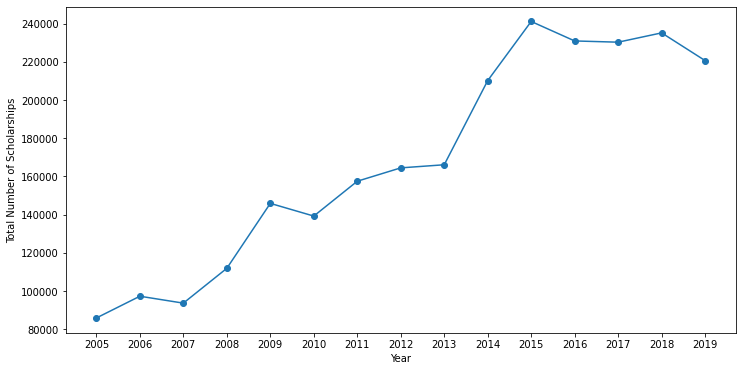

In [43]:
import matplotlib.pyplot as plt

yearly_data = scholarship_data['scholarship_issued_by_year'].value_counts().sort_index(ascending = True)

# Using the plt.figure function to change the size of the figure

plt.figure(figsize=(12,6))
plt.plot(yearly_data.index, yearly_data.values, marker ='o')
plt.ylabel('Total Number of Scholarships')
plt.xlabel('Year')

# Label for x axis
labels = scholarship_data['scholarship_issued_by_year'].unique()

# Setting x-axis values
plt.xticks(yearly_data.index,labels)

***Types***

Text(0.5, 0, 'Percentage')

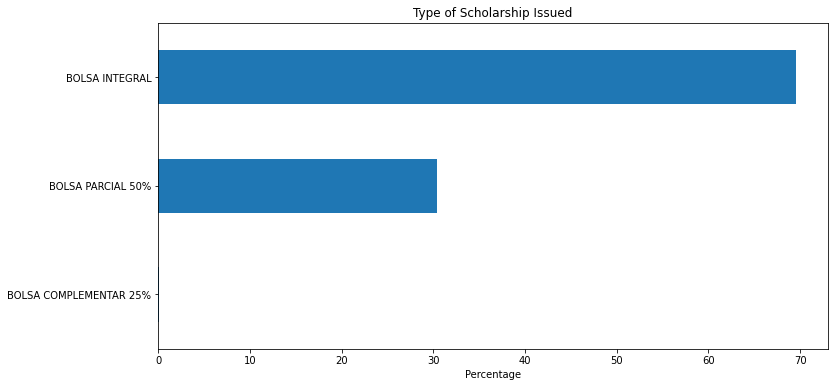

In [58]:
from locale import normalize
# change the figure size
plt.figure(figsize = (12,6))

# convert the scholarship value into percentage by multiplying it by 100 
(scholarship_data.Scholarsip_Name.value_counts(normalize=True, ascending= True)*100).plot(kind = 'barh') 
plt.title('Type of Scholarship Issued')
plt.xlabel('Percentage')

***Gender***

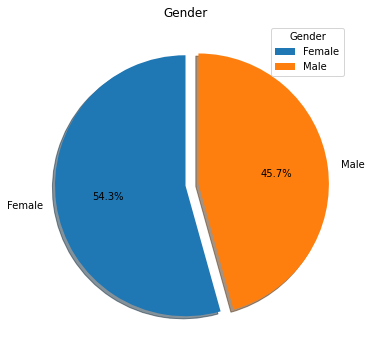

In [70]:
from opendatasets.utils.network import gen_bar_updater
# Explode parameter
explode = (0, 0.1)
my_labels = ['Female', 'Male']

plt.figure(figsize = (12,6))
plt.title('Gender')
plt.pie(scholarship_data['Gender'].value_counts(),
        labels = my_labels,
        explode = explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.legend(title= 'Gender')

***University***

In [110]:
df = scholarship_data.University_Name.value_counts()[:15]
fig = px.bar(df, x= df, y=df.index , orientation='h')
fig.show()

***Special need students***

In [106]:
x = scholarship_data.Special_need_student.value_counts().index
y = scholarship_data.Special_need_student.value_counts().values

import plotly.express as px
 
df = px.data.iris()
 
fig = px.bar(scholarship_data, x = x , y = y).update_layout(
    xaxis_title="Response", yaxis_title="count(In millions)"
)
fig.show()

***Race***

In [113]:
df = scholarship_data.Race.value_counts
fig = px.pie(df, values = df, names='country', title='Race of the Students')
fig.show()

ValueError: ignored